## Objectives

- Load the data as a pandas dataframe
- Clean the data, taking care of the blank entries
- Run exploratory data analysis (EDA) and identify the attributes that most affect the charges
- Develop single variable and multi variable Linear Regression models for predicting the charges
- Use Ridge regression to refine the performance of Linear regression models.

In [23]:
# Import Required Libraries
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score

# 1. Import the dataset

In [24]:
# Load the dataset
file_path ="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv"
df = pd.read_csv(file_path, header=None)

In [25]:
df.head(5)

,0,1,2,3,4,5,6
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520


It is evident that the dataset lacks header. Hence, input the column names

In [26]:
# Check the number of rows and columns
df.shape

(2772, 7)

In [27]:
# Include the column names
headers =["age", "gender", "bmi", "no_of_children", "smoker", "region", "charges"]
df.columns = headers
df

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
2767,47,1,45.320,1,0,4,8569.86180
2768,21,1,34.600,0,0,3,2020.17700
2769,19,2,26.030,1,1,1,16450.89470
2770,23,2,18.715,0,0,1,21595.38229


Replace the "?" entries with "NaN"

In [28]:
df.replace("?", np.nan, inplace=True)

# 2. Data Wrangling

In [29]:
# check out the Null or NaN values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2768 non-null   object 
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2765 non-null   object 
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB
None


In [32]:
# Age is a continuous variable, replace with mean
mean_age = df["age"].astype(float).mean(axis=0)
df["age"].replace(np.nan, age_mean, inplace=True)

# Smoker is a categorical attribute, replace with most frequent entry
is_smoker = df["smoker"].astype(float).value_counts().idxmax()
df["smoker"].replace(np.nan, is_smoker, inplace=True)

# Update data types
df[["age", "smoker"]] = df[["age", "smoker"]].astype("int")

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2772 non-null   int32  
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2772 non-null   int32  
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int32(2), int64(3)
memory usage: 130.1 KB
None


Round the values in "charges" attribute to two decimal places

In [33]:
df["charges"] = np.round(df[["charges"]],2)
df.head(5)

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92
1,18,2,33.770,1,0,4,1725.55
2,28,2,33.000,3,0,4,4449.46
3,33,2,22.705,0,0,1,21984.47
4,32,2,28.880,0,0,1,3866.86


# 3. Exploratory Data Analysis

(0.0, 66902.85800000001)

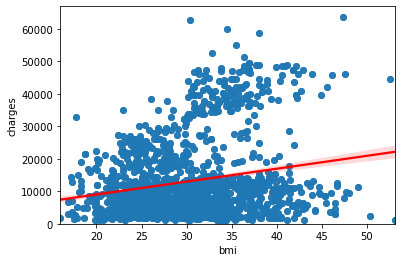

In [35]:
# Check the relationship between "bmi" and "charges" with regression plot since its a continuous variable
sns.regplot(x="bmi", y="charges", data=df, line_kws={"color": "red"})
plt.ylim(0,)

<AxesSubplot:xlabel='smoker', ylabel='charges'>

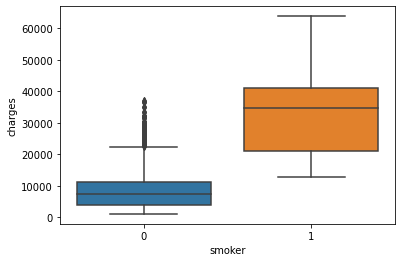

In [39]:
# Check the relationship between "smokers" and "charges" with regression plot since its a categorical variable
sns.boxplot(x="smoker", y="charges", data=df)

In [40]:
# Print the correlation matrix for the dataset
df.corr()

,age,gender,bmi,no_of_children,smoker,region,charges
age,1.000000,-0.026046,0.113048,0.037574,-0.023286,-0.007167,0.298624
gender,-0.026046,1.000000,0.042924,0.016020,0.082326,0.022213,0.062837
bmi,0.113048,0.042924,1.000000,-0.001492,0.011489,0.271119,0.199846
no_of_children,0.037574,0.016020,-0.001492,1.000000,0.006362,-0.025717,0.066442
smoker,-0.023286,0.082326,0.011489,0.006362,1.000000,0.054077,0.788783
region,-0.007167,0.022213,0.271119,-0.025717,0.054077,1.000000,0.054058
charges,0.298624,0.062837,0.199846,0.066442,0.788783,0.054058,1.000000


# 4. Model Development

Fit a linear regression model to predict **charges** value by using only one feature **smoker**. Print the R^2 score of the model.

In [44]:
lr = LinearRegression()

lr.fit(df[["smoker"]], df["charges"])

Rscore = lr.score(df[["smoker"]], df["charges"])
Rscore

0.6221791733924185

Fit a linear regression model that may be used to predict the **charges**, using other attributes of the dataset. Print the R^2 of the model.

In [46]:
lr1 = LinearRegression()

Z = df[["age", "gender", "bmi", "no_of_children", "smoker", "region"]]
Y = df["charges"]

lr1.fit(Z, Y)

lr1.score(Z, Y)

0.7504083820289634

This result portrays that the linear regression with all the independent features is likely a better fit with R^2 ~ 0.75, compared to the linear regression with only one independent feature that has R^2 ~0.62. 

# 5. Model Refinement

Split the data into training and testing subsets, reserving 20% for testing

In [49]:
x_train, x_test, y_train, y_test = train_test_split(Z, Y, test_size=0.2, random_state=1)

Initialize a ridge regressor that uses hyperparameter alpha =0.1. Fit the model using training data subset. Print the score for the testing data.

In [50]:
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train, y_train)
yhat = RidgeModel.predict(x_test)
print(r2_score(y_test,yhat))

0.6760807731582404


Apply polynomial transformation to the training parameters with degree=2. Use this transformed feature set to fit the same regression model, as above, using the training subset. Print the R^2 score for the testing subset.

In [51]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
RidgeModel.fit(x_train_pr, y_train)
y_hat = RidgeModel.predict(x_test_pr)
print(r2_score(y_test,y_hat))

0.7835631107608153


Since the R^2 for the linear regression is ~ 0.67 and that of polynomial regression with degree 2 is ~ 0.78. It could be said that polynomial regression best fit the data.